<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/mlc_pods_2324_w8_webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MLC/PoDS Assignment FAQ (Week 8, 23/24)

## How much data do I need? What size of sample do I need so that I am trying to do works? ...

* I have made a suggestion that you could work with a small sample of data, specially at the early stages, when you still prototyping/trying things out, so that computationally things are simpler (also, cognitively).

* Diabetes dataset: instead of thinking of the smallest sample need, think about what population the data represents.
    - on PIMA indigenous population (US/Canada)
    - All patients were female
    - About 1/3 are diabetic
    - About 1/3 are obese
    - So, we are formulating hypotheses on this or building predictive models, we should really only claim that we are able to do that for that specific population.

* For the assignment and in general: we need an understanding of the data and the domain (e.g., ranges, where the bulk of the data is, and so on); which regions of the data might be under/over-represented (i.e., if we have lots of Fiat Punto, with similar characteristics, you might decide that you can safely work with a subset; or might decide not to work with vintage cars, and so on). We make the statements about the population that we believe we are working with.

## How could I sample the data? What if I would like to make sure that categories are not under-represented or removed from the data?

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
df = fetch_openml("adult", as_frame=True, parser="pandas")['data']

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba


In [ ]:
df.shape

(48842, 14)

In [ ]:
# just a random sample
sample_df = df.sample(1000)
sample_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
42285,1,Private,109857,Assoc-voc,11,Divorced,Tech-support,Unmarried,White,Female,0,0,2,United-States
21075,1,Private,176673,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Female,0,0,2,United-States
7287,1,Private,164526,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,2,Yugoslavia
41905,1,Private,183801,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States
23701,1,Private,447066,Bachelors,13,Married-civ-spouse,Sales,Husband,Black,Male,4,0,3,United-States


In [ ]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [ ]:
sample_df['native-country'].value_counts()

United-States                 879
Mexico                         23
Philippines                    11
Puerto-Rico                     9
Cuba                            8
Canada                          6
Germany                         5
El-Salvador                     4
South                           4
Thailand                        4
Ecuador                         3
Japan                           3
Guatemala                       3
Columbia                        3
Jamaica                         3
England                         2
Dominican-Republic              2
Taiwan                          2
India                           2
Laos                            1
Yugoslavia                      1
Nicaragua                       1
Outlying-US(Guam-USVI-etc)      1
Hong                            1
Italy                           1
Iran                            1
Trinadad&Tobago                 1
Greece                          1
France                          1
Portugal      

In [ ]:
# stratified sample: instances of different categories are represented in my sample

In [ ]:
df.groupby('native-country').sample()['native-country'].value_counts()

Cambodia                      1
Italy                         1
Japan                         1
Laos                          1
Mexico                        1
Nicaragua                     1
Outlying-US(Guam-USVI-etc)    1
Peru                          1
Philippines                   1
Poland                        1
Portugal                      1
Puerto-Rico                   1
Scotland                      1
South                         1
Taiwan                        1
Thailand                      1
Trinadad&Tobago               1
United-States                 1
Vietnam                       1
Jamaica                       1
Ireland                       1
Canada                        1
Iran                          1
China                         1
Columbia                      1
Cuba                          1
Dominican-Republic            1
Ecuador                       1
El-Salvador                   1
England                       1
France                        1
Germany 

In [ ]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
df.groupby('education').sample(frac=0.01).head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
46458,0,NaN,163053,10th,6,Never-married,NaN,Not-in-family,White,Female,0,0,0,United-States
3800,3,Local-gov,135840,10th,6,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,2,United-States
33607,4,Federal-gov,171995,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1,0,2,United-States


In [ ]:
df.groupby('education').sample(n=10).head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
23356,2,Private,213140,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,1,0,2,United-States
35753,1,Private,362787,10th,6,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,1,United-States
955,2,Private,239683,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,1,NaN


In [ ]:
# this approach sample(frac=0.01) preserves the distribution of the data

In [ ]:
df.groupby('education').sample(frac=0.01)['education'].value_counts(normalize=True)

HS-grad         0.322449
Some-college    0.222449
Bachelors       0.163265
Masters         0.055102
Assoc-voc       0.042857
11th            0.036735
Assoc-acdm      0.032653
10th            0.028571
7th-8th         0.020408
9th             0.016327
Prof-school     0.016327
12th            0.014286
Doctorate       0.012245
5th-6th         0.010204
1st-4th         0.004082
Preschool       0.002041
Name: education, dtype: float64

In [ ]:
df['education'].value_counts(normalize=True)

HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64

In [ ]:
df.groupby('education').sample(n=10)['education'].value_counts(normalize=True)

10th            0.0625
11th            0.0625
12th            0.0625
1st-4th         0.0625
5th-6th         0.0625
7th-8th         0.0625
9th             0.0625
Assoc-acdm      0.0625
Assoc-voc       0.0625
Bachelors       0.0625
Doctorate       0.0625
HS-grad         0.0625
Masters         0.0625
Preschool       0.0625
Prof-school     0.0625
Some-college    0.0625
Name: education, dtype: float64

## My suggestion was to work with the bulk of the data first; leave the more complicated/unusual/outlier cases aside; you can always come back to them later; also, at early stages, you can perhaps work with the most frequent categories

In [ ]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [ ]:
# I'd select to take a subset of the data associated with the most frequent values
# of categorical feature 'x' (e.g., country)
freq_dist = df['native-country'].value_counts()

In [ ]:
top_five_countries = freq_dist.head(5)

In [ ]:
names_of_countries = top_five_countries.index.tolist()

In [ ]:
df.loc[ df['native-country'].isin(names_of_countries) ]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States
5,2,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,2,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States
48838,4,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,2,United-States
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States


In [ ]:
# Problems with Windows paths?

In [ ]:
file_path = r'C:\User\My Stuff\PoDS\dataset.csv'

In [ ]:
file_path = 'C:/User/My Stuff/PoDS/dataset.csv'

In [ ]:
# Categorical Encoding? (We'll work on it next week, but there are some pointers...)

In [ ]:
# low cardinality (i.e., small number of categorical values)
# one-hot encoding
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

# high cardinality
# target encoding
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.TargetEncoder.html

In [ ]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
df[['workclass']].head()

,workclass
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private


In [ ]:
df['workclass'].isna().sum()

2799

In [ ]:
df['workclass'].mode()[0]

'Private'

In [ ]:
df['fnlwgt'].mean()

189664.13459727284

In [ ]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [ ]:
df[['workclass']].head()

,workclass
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private


In [ ]:
ohe.fit_transform(df[['workclass']])

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48839,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48840,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# LabelEncoding: for target
# OneHotEncoding, OrdinalEncoding, TargetEncoding: for predictors

In [ ]:
# Some algorithms have embedded support for categorical features/values (e.g., XGBoost, CatBoost, ...)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  category
 1   workclass       48842 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capitalgain     48842 non-null  category
 11  capitalloss     48842 non-null  category
 12  hoursperweek    48842 non-null  category
 13  native-country  47985 non-null  category
dtypes: category(12), int64(2)
memory usage: 1.3 MB


In [ ]:
summary = df.groupby(['workclass', 'occupation']).size().unstack()
summary

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,487,15,93,268,9,36,19,55,0,253,47,17,96,37
Local-gov,421,0,211,331,43,65,24,300,0,1061,450,16,58,156
Never-worked,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Private,4208,0,4748,3995,670,1923,2882,4057,242,3409,299,4439,1154,1880
Self-emp-inc,47,0,167,617,82,6,17,42,0,245,5,420,9,38
Self-emp-not-inc,70,0,798,587,653,21,59,276,0,575,7,591,42,183
State-gov,375,0,94,287,25,19,19,191,0,629,175,20,87,60
Without-pay,3,0,1,1,8,2,2,2,0,0,0,1,0,1


<Axes: xlabel='occupation', ylabel='workclass'>

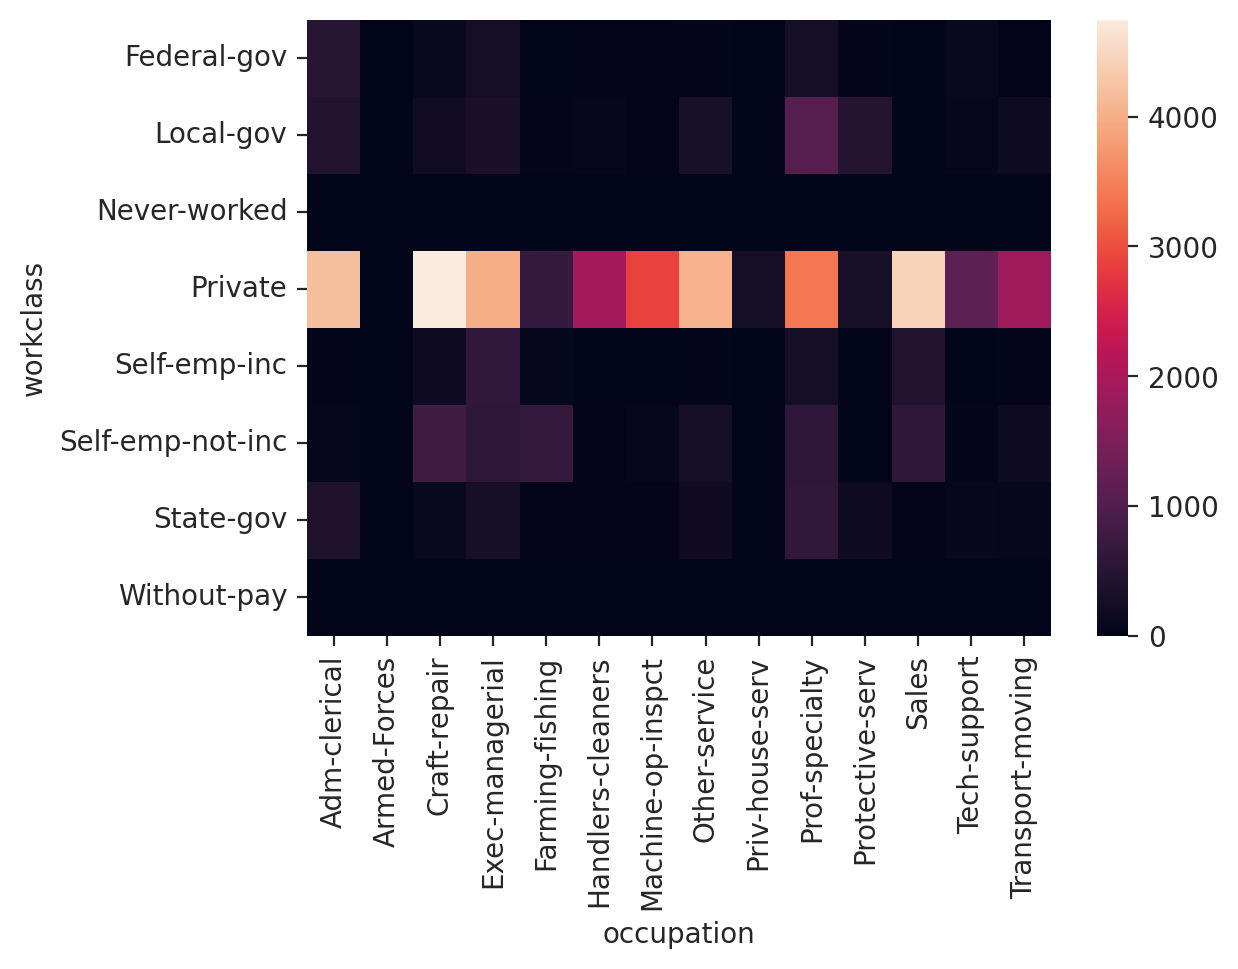

In [ ]:
sns.heatmap(summary)